<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Continuous Probability Distributions

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of the following distributions: Continuous Uniform, Exponential, Normal.
- Describe why the Normal distribution is seen everywhere.
- State the Central Limit Theorem.

## Recap

> “Mathematics, a veritable sorcerer in our computerized society, while assisting the trier of fact in the search for truth, must not cast a spell over him.” – California Supreme Court, _People v. Collins_ (1968)

**Check**: What is a distribution?
<details><summary>Answer</summary>

- A distribution is the set of all values of a variable and how frequently we observe each value.
</details>

**Check**: What is the difference between a continuous random variable and discrete random variable?
<details><summary>Answer</summary>
    
- A continuous random variable takes on an uncountably infinite number of values. 
- A discrete random variable takes on a countable number of values.
</details>

**Check**: Describe these distributions:
- Discrete Uniform
- Bernoulli
- Binomial
- Poisson

<details><summary>Answer</summary>

- A discrete uniform distribution takes on a range of values that are all equally likely. 
    -  Example: the value from rolling one die.
- A Bernoulli distribution has two outcomes, usually called "success" and "failure." The only parameter is the probability of success $p$.
    - Example: the number of heads flipped when flipping one coin.
- A Binomial distribution counts the number of successes we observe in a fixed number of $n$ independent Bernoulli trials. 
    - Example: the number of heads flipped when flipping fifty coins.
- A Poisson distribution counts the number of successes we observe in a fixed amount of time.
    - Example: the number of cars that enter a toll road in an hour.
</details>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Earlier, we spoke about the **discrete uniform** distribution, where each outcome is equally likely.

This is the **probability mass function** of a discrete uniform.
- Remember that a probability mass function shows us the probability that our random variable takes on a specific value.

<img src="./images/discrete_uniform_pmf.png" alt="discrete uniform pmf" width="700"/>

This is the **cumulative distribution function** of a discrete uniform.
- Remember that a cumulative distribution function shows us the probability that our random variable takes on any value less than or equal to a specific value.

<img src="./images/discrete_uniform_cdf.png" alt="discrete uniform cdf" width="700"/>

$$
\begin{eqnarray*}
\text{probability mass function}: P(X = x) \\
\text{cumulative distribution function}: P(X \le x)
\end{eqnarray*}
$$

---

# Continuous Distributions!

One small notation difference: when dealing with continuous distributions, we use **probability density functions**, not probability mass functions.
- This has to do with how probability is defined.

## The Continuous Uniform distribution

When dealing with an uncountably infinite range of outcomes, we might use a **continuous uniform** instead of a discrete uniform distribution.

Parameters of the distribution:

- $a$, the minimum value of the distribution.
- $b$, the maximum value of the distribution.

#### Continuous Uniform pdf

The Continuous Uniform pdf is defined as:

$$ f(x|a,b) = \frac{1}{b-a} $$

One of the most common examples of this is where we want to randomly sample a number between 0 and 1.
- This is incredibly valuable if we want to model some complex process through random simulations. (For example, you can estimate the value of $\pi$ in this way!)

**Check:**
<details><summary> Since we know what a discrete uniform pmf looks like, what do you expect the shape of your continuous uniform pdf to look like?</summary>
    
- [Head to this site!](http://students.brown.edu/seeing-theory/probability-distributions/index.html#section2)
</details>

## The Exponential distribution

---

"Given that we usually see ten customers per hour, how long from now will it take for the next visitor to arrive?"

When do we use the Exponential distribution?
- We use the Exponential distribution when we are interested in modeling the **amount of time until a success occurs**.

Since time is continuous, the Exponential distribution is a continuous distribution.

Parameters of the distribution:

- $\beta$, the average time to an event.

<details><summary>Based on historical data, we see an average of 10 visitors per hour. From this, how long do you think it will take on average for a new person to visit?</summary>

- 6 minutes.

$$
\begin{eqnarray*}
\frac{\text{10 visitors}}{\text{1 hour}} = \frac{\text{10 visitors}}{\text{60 minutes}} = \frac{\text{1 visitor}}{\text{6 minutes}}
\end{eqnarray*}
$$
</details>

#### Exponential pdf

The Exponential pdf is defined as:

$$ f(x|\beta) = \frac{1}{\beta}  e^{-x/\beta} $$

In this case, $x$ is the time elapsed.

In [2]:
# This code has been slightly adapted from code written by a former GA instructor.

def plot_continuous_pdf(low, high, dist_name = 'Continuous', xlabel = 'Time', stats_dist = None, lw = 5):
        
    x = np.arange(low, high + 1)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low - 1, high + 1)
    ax.set_xlabel(xlabel, fontsize = 16)
    ax.set_ylabel('Probability Density Function (pdf)', fontsize = 16)
    ax.plot(x, stats_dist.pdf(x), color = 'darkred', lw = lw)
    ax.set_ylim(0, np.max(stats_dist.pdf(x)) + 0.03)
    
    plt.title(f'{dist_name} \n', fontsize = 20)

    plt.show()

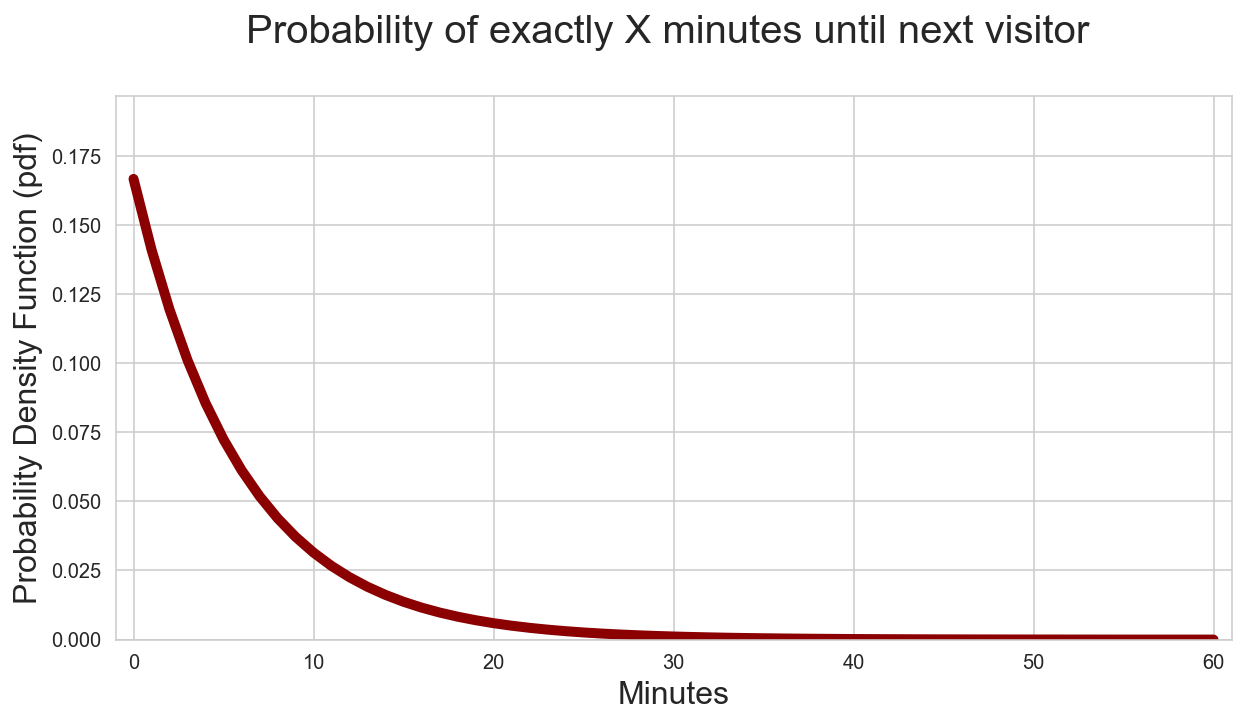

In [3]:
# This code has been slightly adapted from code written by a former GA instructor.

plot_continuous_pdf(0, 60, dist_name='Probability of exactly X minutes until next visitor', 
                    stats_dist=stats.expon(scale = 6), xlabel='Minutes')

If we want to know the probability of a specific range (i.e. "What is the probability that the visitor takes at least 5 but less than 10 minutes to show up?"), it's generally easier to use the cumulative distribution function.

#### Exponential cdf

The cumulative distribution function is:

$$ F(x|\beta) = 1 -  e^{-x/\beta} $$

With the same example, our cumulative distribution function looks like:

In [4]:
# This code has been slightly adapted from code written by a former GA instructor.

def plot_continuous_cdf(low, high, dist_name = 'Continuous', xlabel = 'Time', stats_dist = None):
        
    x = np.linspace(low, high + 1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low - 1, high + 1)
    ax.set_xlabel(xlabel, fontsize = 16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize = 16)
    
    ax.plot(x, stats_dist.cdf(x), lw = 4, color = 'darkblue')

    plt.title(f'{dist_name} \n', fontsize = 20)

    plt.show()

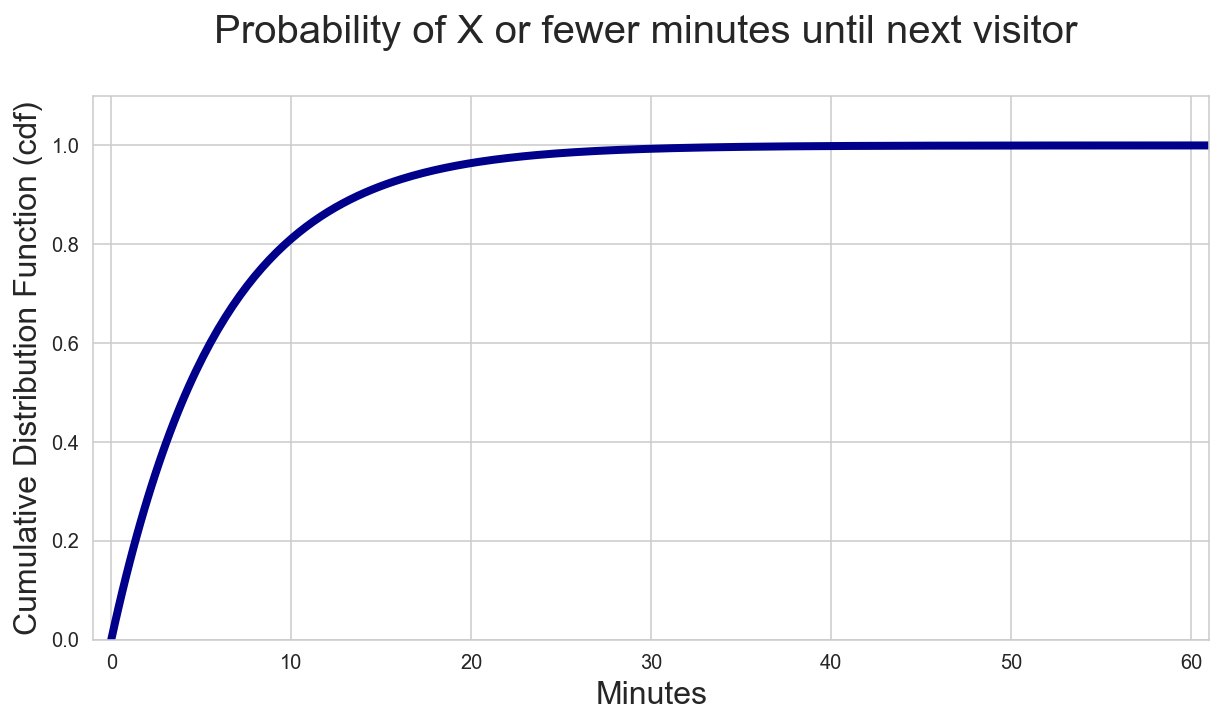

In [5]:
# This code has been slightly adapted from code written by a former GA instructor.

plot_continuous_cdf(0, 60, dist_name='Probability of X or fewer minutes until next visitor', 
                    stats_dist=stats.expon(scale=6), xlabel='Minutes')

In [6]:
dist = stats.expon(scale = 6)
dist.pdf(np.linspace(0, 60 + 1, 100))

array([1.66666667e-01, 1.50400571e-01, 1.35721990e-01, 1.22475989e-01,
       1.10522752e-01, 9.97361098e-02, 9.00022071e-02, 8.12183000e-02,
       7.32916721e-02, 6.61386559e-02, 5.96837496e-02, 5.38588201e-02,
       4.86023837e-02, 4.38589575e-02, 3.95784735e-02, 3.57157500e-02,
       3.22300152e-02, 2.90844761e-02, 2.62459308e-02, 2.36844179e-02,
       2.13728998e-02, 1.92869780e-02, 1.74046350e-02, 1.57060022e-02,
       1.41731502e-02, 1.27898993e-02, 1.15416489e-02, 1.04152235e-02,
       9.39873339e-03, 8.48144920e-03, 7.65368881e-03, 6.90671500e-03,
       6.23264327e-03, 5.62435863e-03, 5.07544049e-03, 4.58009489e-03,
       4.13309331e-03, 3.72971756e-03, 3.36570990e-03, 3.03722814e-03,
       2.74080508e-03, 2.47331189e-03, 2.23192512e-03, 2.01409687e-03,
       1.81752792e-03, 1.64014342e-03, 1.48007104e-03, 1.33562117e-03,
       1.20526912e-03, 1.08763898e-03, 9.81489145e-04, 8.85699166e-04,
       7.99257961e-04, 7.21253122e-04, 6.50861287e-04, 5.87339455e-04,
      

In [7]:
# What is the probability that our next visitor shows up in 10 minutes or less?
stats.expon.cdf(10, scale = 6)

0.8111243971624382

In [8]:
# What is the probability that our next visitor shows up in over 10 minutes?
1 - stats.expon.cdf(10, scale = 6)

0.18887560283756177

In [9]:
# What is the probability that our next visitor shows up in more than 5 minutes but less than 10 minutes?
stats.expon.cdf(10, scale = 6) - stats.expon.cdf(5, scale = 6)

0.24572260566951643

<a id='normal'></a>

## The Normal distribution

---

The Normal distribution is the most well known and most important distribution. **Many** real-world processes can be modeled using a Normal distribution.

Parameters of the Normal distribution:

- $\mu$ is the mean.
- $\sigma$ is the standard deviation of the distribution. (You may also see this parameterized using variance, or $\sigma^2$.)

#### Normal pdf

The probability density function of the Normal distribution is given by

### $$ f(x \; | \; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

Let's assume that the number of visitors to our site in an hour takes on an average of 25 with a standard deviation of 5.

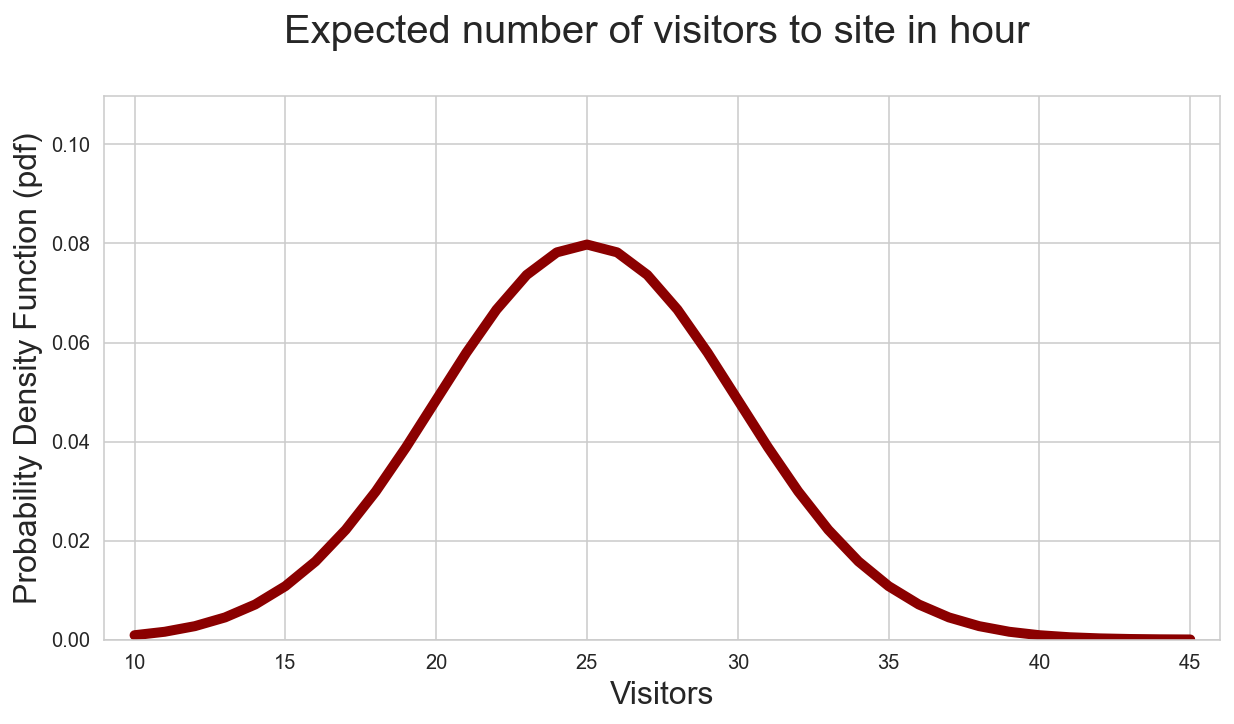

In [10]:
plot_continuous_pdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(25, 5), xlabel='Visitors')

#### Normal cdf

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) If you want, see the Wikipedia page for the details on how it is calculated. 

We can plot it here, however, using SciPy.

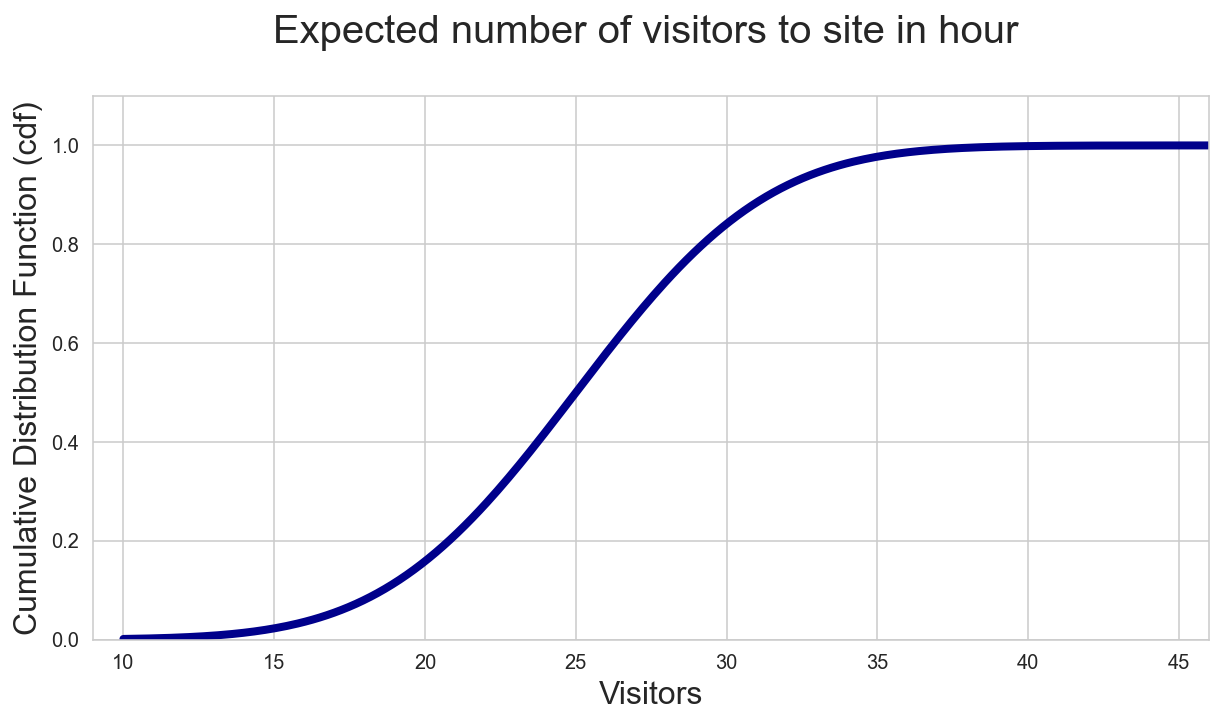

In [11]:
plot_continuous_cdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(25, 5), xlabel='Visitors')

### Summary Statistics

For these "named" distributions (distributions that have names), they have been studied well enough that we know some nice properties. 

For example:
- The mean of the Continuous Uniform distribution is exactly $\frac{b+a}{2}$.
- The mean of the Exponential distribution is exactly $\beta$.
- The mean of the Normal distribution is exactly $\mu$.
- The mean of the Discrete Uniform distribution is exactly $\frac{N+1}{2}$, assuming that your discrete bins are 1, 2, 3, $\ldots$, $N$.
- The mean of the Bernoulli distribution is exactly $p$.
- The mean of the Binomial distribution is exactly $np$.
- The mean of the Poisson distribution is exactly $\lambda$.

(You may also read the term "expected value" instead of mean.)

For almost every "named" distribution, we can exactly calculate the mean... or the median, or the mode(s), or the likeliest 90%... using the parameter(s) of the distribution.

## Moving from Distributions to Data

It's sometimes nice to use pdfs and cdfs. They can help us to answer many problems, like we've seen earlier.

<details><summary>However, in the real world, we might not have access to the pdf or the cdf. Why is that?</summary>
    
- In this case, someone has to tell us (or we have to believe) that our population truly follows a specific probability distribution. It's probably not often the case that our population perfectly follows a specific distribution.
- However, there's a really, really special and important result in statistics that does have to do with a common probability distribution that we rely on a lot. Let's check it out more.
</details>

Let's simulate some data. In order to do this, let's first import `numpy`.

In [12]:
import numpy as np

In [13]:
# Let's make sure we get the same results!
np.random.seed(42)

In [14]:
# Generate five numbers from a Uniform(0,1) distribution.
data = np.random.uniform(0,1,5)

In [15]:
# Look at our data.
data

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

**Check:** Note that dice rolls follow a discrete uniform distribution. Take ninety seconds to simulate 10,000 dice rolls. You may find [this](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) helpful.
- If you're stuck, ask a neighbor!
- If you're finished, help a neighbor!

In [16]:
# Simulate 10,000 dice rolls.
dice =[1,2,3,4,5,6]
dice_rolls = [np.random.choice(dice) for i in range(10_000)]

In [17]:
print(len(dice_rolls))
# Check the first 15 rolls.
dice_rolls[0:15]

10000


[3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4, 5]

Now let's plot these using a package called `seaborn`.

In [18]:
# We import seaborn with the alias "sns." There's a fun trivia fact here!
import seaborn as sns

(0.0, 10.0)

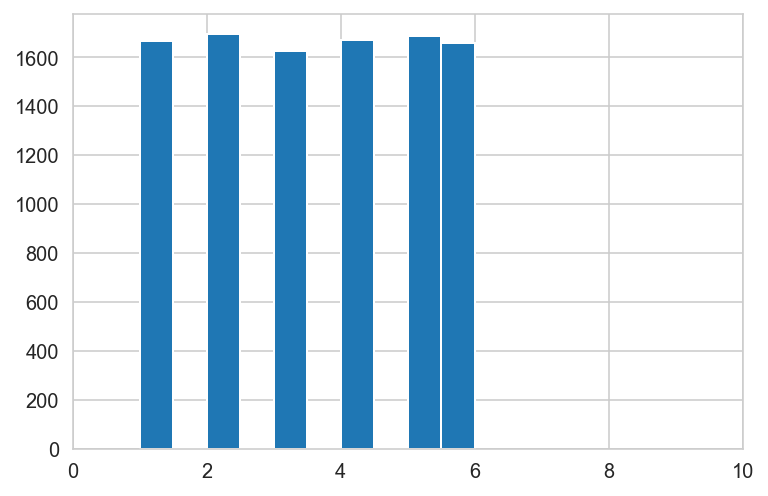

In [19]:
plt.hist(dice_rolls);
#plt.ylim(0,10)
plt.xlim(0,10)

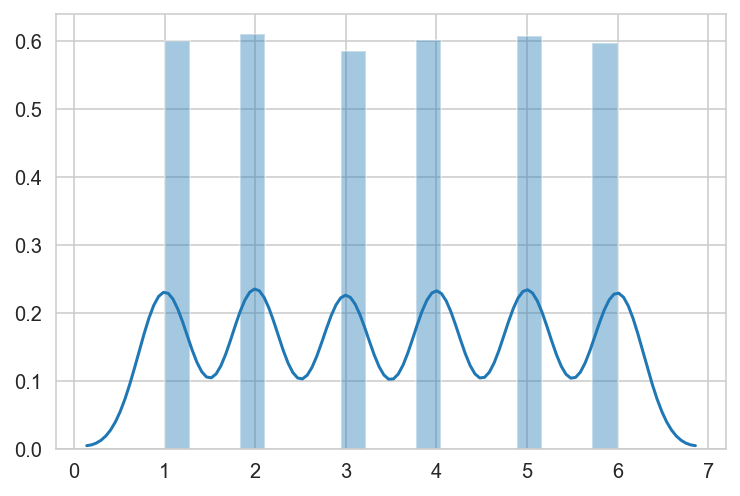

In [20]:
# Plot 10,000 dice rolls.
sns.distplot(dice_rolls);

In [21]:
1/6

0.16666666666666666

There are plenty of casino games that ask you to roll two dice, then sum their values. (Perhaps most famous is the game [Craps](https://www.casinotop10.net/craps-rules).)

In [22]:

# Roll two dice.
np.random.choice(dice,
                 size = 2)

array([6, 6])

In [23]:
# Roll two dice and sum their results.
sum(np.random.choice(dice, size = 2))

7

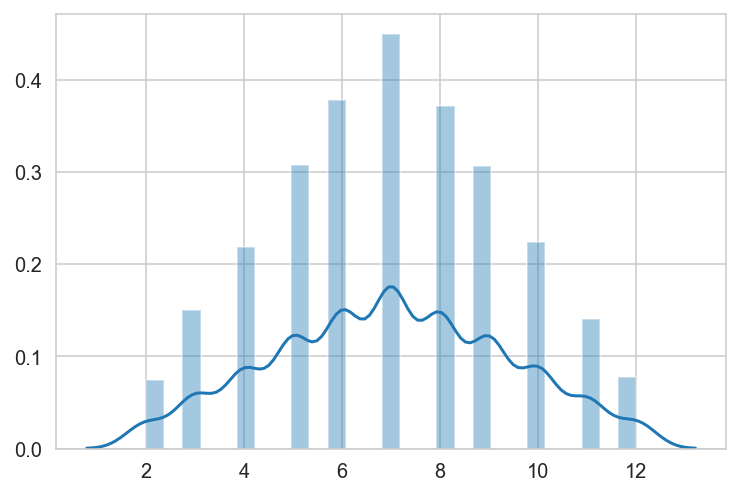

In [24]:
# Roll a pair of dice, sum the pair, repeat 10,000 times, and plot results.
sns.distplot([sum(np.random.choice(dice, size = 2)) for i in range(10_000)]);

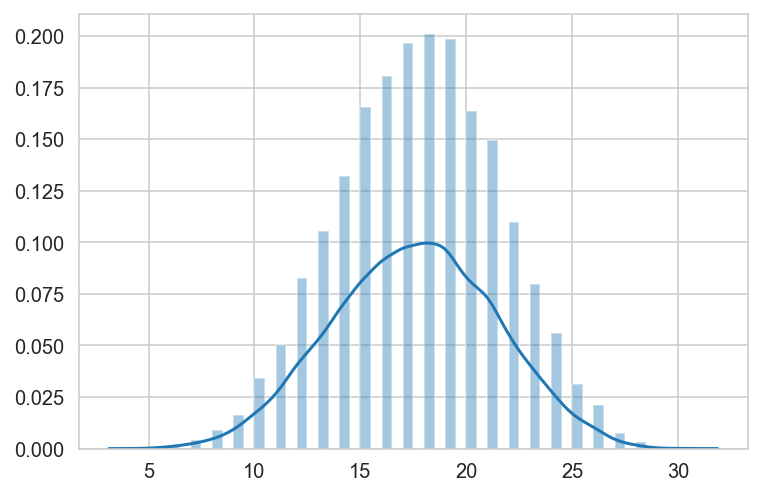

In [25]:
# Roll 5 dice, sum the pair, repeat 10,000 times, and plot results.
sns.distplot([sum(np.random.choice(dice, size = 5)) for i in range(10_000)]);

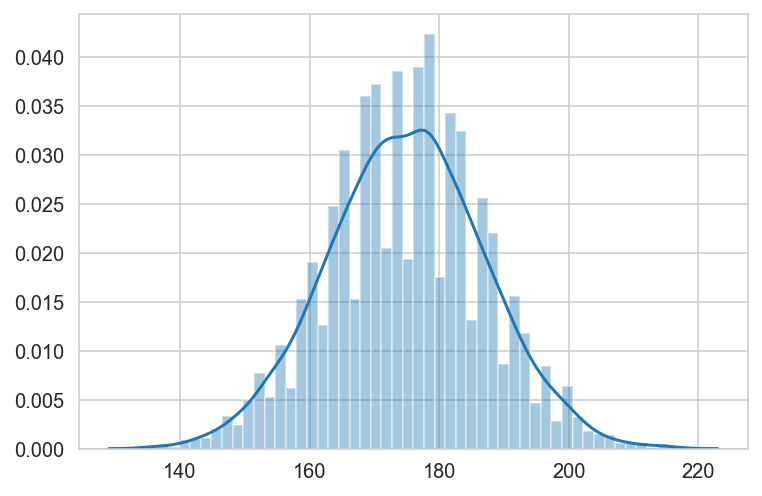

In [26]:
# Roll 50 dice, sum the pair, repeat 10,000 times, and plot results.
sns.distplot([sum(np.random.choice(dice, size = 50)) for i in range(10_000)]);

<details><summary>As the number of dice we sum increases, what happens to the shape of our distribution? </summary>
    
- Our distribution becomes more Normal!
</details>

### **This is the Central Limit Theorem at play!**

### Central Limit Theorem

If you add **any** independent random variables from **any** distribution... as long as you add enough of them, this sum will follow the Normal distribution!

> Since the mean of random variables is just the sum of independent random variables divided by a constant, the Normal distribution also models the mean of independent random variables from **any** distribution (if we average enough random variables). 

> *Want to test this on your own? Plot the data from above, but calculate the mean instead of the sum!*

**Because we often deal with sums (or averages) of things, the Central Limit Theorem causes the Normal distribution to appear all over the place.** This is good! Normality is the most common assumption we'll make about the distribution of our data or our errors. Normality underlies many of the inferential techniques that we seek to use. It is important for us to determine when Normality is a condition we've met.

### Visualizing the Central Limit Theorem
Check out a fantastic resource [here](https://seeing-theory.brown.edu/probability-distributions/index.html#section3).

### Stating the Central Limit Theorem
**The Central Limit Theorem states that, as our sample size $n$ gets closer to $\infty$, the distribution of all possible sample means approaches a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.**

#### Why do we care?
In many cases, I want to use my data to learn about the mean of some population. If all possible sample means are Normally distributed, then we can use the Normal distribution with the sample mean to **conduct inference on** (learn about) the population mean!

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of the following distributions: Continuous Uniform, Exponential, Normal.
- State the Central Limit Theorem.

<details><summary>What is the Continuous Uniform distribution?</summary>
<li> The Continuous Uniform distribution is a distribution that takes on an uncountable number of values with equal probability.
<li> An example of the Continuous Uniform might be:
<ul>
<li> Randomly generate a number between 0 and 1.
</ul>
</details>
<br>
<details><summary>What is the Exponential distribution?</summary>
<li> Just like the Poisson distribution is the Binomial distribution taken to the limit, the Exponential distribution is the Geometric distribution taken to the limit. The Exponential distribution models the amount of time until an event occurs.
<li> Examples of the Exponential distribution might be:
<ul>
<li> The amount of time until a light bulb stops working.
<li> The amount of time until a bus arrives at the stop.
</ul>
</details>
<br>
<details><summary>What is the Normal distribution?</summary>
<li> The Normal distribution is the most widely-known distribution. It is symmetric, bell-shaped, and is parameterized by its mean and variance/standard deviation.
<li> Examples of the Normal distribution might be:
<ul>
<li> The intelligence quotient (IQ) of individuals.
<li> The average values of 1,000 dice rolls.
</ul>
</details>
<br>
<details><summary>Why is the Normal distribution seen everywhere?</summary>
<li> The Normal distribution naturally models a lot of real-world phenomena. However, the Normal distribution also models the sum of **any** random variables and the mean of **any** random variables. We often count or average things, so this will pop up frequently. In addition, some distributions naturally are means/sums of other random variables (Poisson, Binomial, and lots of others we haven't officially discussed) so we can use the Normal distribution in lots of cases!
</details>
<br>
<details><summary>State the Central Limit Theorem.</summary>
<li> The Central Limit Theorem states that, as $n \rightarrow \infty$, the sampling distribution of $\bar{X}$ will approach a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
</details>

### Resources
- The [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) is a way for us to estimate whether two samples come from the same distribution or whether one sample comes from a particular distribution. (This will make more sense after you've covered hypothesis testing in inference.)